# Here we are going to find the mapping of the point to the isochrone by minimising over logg space and feh space. 

This will use the gaia parameters. However, were isochrones used to dervie these in the first place? Not sure. This i a pretty simple procedure though. It doesn't use the method developed before.



### Load in the data

In [2]:
import pickle
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir('Data')
pkl_file = open('isochrones.pkl', 'rb')
stacked_isochrones = pickle.load(pkl_file)

pkl_file = open('columns.pkl', 'rb')
x_columns = pickle.load(pkl_file)

pkl_file = open('x_values.pkl', 'rb')
x_values = pickle.load(pkl_file)

pkl_file = open('isoc_cols.pkl', 'rb')
isoc_columns = pickle.load(pkl_file)

x_input=pd.read_csv('x_input')
x_input_err=pd.read_csv('x_input_err')

os.chdir('..')

In [3]:
import torch
def find_nearest(array, value):
    #array = np.asarray(array)
    idx = (torch.abs(array - value)).argmin()
    return array[idx],idx

def isochrone_selector(feh,age):
    '''if(feh<-4 or feh>0.5):
        raise NotImplementedError
    if(age<5 or age>10.3):
        raise NotImplementedError
    else:'''
    logagegrid = torch.tensor(np.linspace(5,10.3,105))
    fehgrid = torch.tensor(np.linspace(-4,0.5,90))
    feh,feh_idx=find_nearest(fehgrid,feh)
    age,age_idx=find_nearest(logagegrid,age)

    return feh_idx*len(logagegrid)+age_idx

def column_index(name):
    if name in x_columns:
        return np.where(np.array(x_columns)==name)[0][0]
    else:
        return np.where(np.array(isoc_columns)==name)[0][0] +len(x_columns)

### Get the necessary columns

In [5]:
x_columns

array(['ra', 'dec', 'parallax', 'phot_g_mean_mag', 'phot_g_mean_flux',
       'phot_rp_mean_flux', 'phot_bp_mean_flux', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'bp_rp', 'mean_absolute_mag_g_band',
       'ra_error', 'dec_error', 'parallax_error',
       'phot_g_mean_flux_error', 'phot_bp_mean_flux_error',
       'phot_rp_mean_flux_error', 'mh_gspphot', 'logg_gspphot',
       'phot_g_mean_mag_error', 'bp_error', 'rp_error', 'bp_rp_error',
       'G'], dtype=object)

In [6]:
import minimint
filters = ["Gaia_G_EDR3", "Gaia_BP_EDR3", 'Gaia_RP_EDR3']
ii = minimint.Interpolator(filters)


massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = np.linspace(5,10.3,10)
fehgrid = np.linspace(-4,0.5,90)
dfs=[]
for feh in fehgrid:
    for lage in logagegrid:
        iso = pd.DataFrame(ii(massgrid, lage, feh))
        dfs.append(iso[iso['phase']==0].reset_index(drop=True))

### Given a row calculate the distance in logg feh space


In [7]:
df_x=pd.DataFrame(x_values[:,:,0],columns=x_columns)

In [8]:
df_x

,ra,dec,parallax,phot_g_mean_mag,phot_g_mean_flux,phot_rp_mean_flux,phot_bp_mean_flux,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,...,phot_g_mean_flux_error,phot_bp_mean_flux_error,phot_rp_mean_flux_error,mh_gspphot,logg_gspphot,phot_g_mean_mag_error,bp_error,rp_error,bp_rp_error,G
0,282.605871,-6.285981,0.507387,16.404120,5167.715909,3876.549346,2425.859397,16.876379,15.776782,1.099597,...,3.639983,10.207194,14.392979,-2.0523,4.3641,0.002859,0.005929,0.004903,0.007693,4.930817
1,282.610660,-6.223920,0.414973,15.952048,7836.597914,5993.184109,3729.496588,16.409416,15.303751,1.105665,...,4.474360,15.521529,8.868863,-0.7115,4.3682,0.002824,0.005891,0.003220,0.006713,4.042148
2,282.610679,-6.250028,0.464578,16.118809,6720.839791,5265.982076,3198.065088,16.576324,15.444197,1.132128,...,3.836132,10.380806,18.499730,-0.8043,4.4274,0.002824,0.005168,0.004726,0.007003,4.454101
3,282.615905,-6.195400,0.455174,16.738075,3799.411889,3552.040656,1709.063662,17.256647,15.871700,1.384947,...,4.374199,9.564557,21.343086,-2.6389,4.3434,0.003026,0.007156,0.007095,0.010077,5.028964
4,282.617394,-6.285022,0.386008,14.585701,27584.585906,17640.015588,15755.160439,14.844985,14.131648,0.713337,...,10.341982,28.872372,83.859900,-0.1581,3.5979,0.002785,0.004271,0.005867,0.007257,2.518685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,282.803007,-6.056913,0.395415,16.080368,6963.049555,5647.518758,3074.316473,16.619171,15.368251,1.250920,...,3.778181,10.411350,12.415644,-0.6997,4.3645,0.002818,0.005273,0.003672,0.006425,4.065633
847,282.792623,-6.051856,0.424239,13.486980,75884.837880,53535.371005,38981.029432,13.861409,12.926293,0.935116,...,21.492193,38.411700,44.480198,-0.1351,3.4562,0.002772,0.003928,0.002932,0.004902,1.625033
848,282.840875,-6.043056,0.533869,16.632505,4187.400676,3402.451865,1810.603897,17.193983,15.918415,1.275568,...,3.368146,15.695131,20.524431,-3.6882,4.3134,0.002890,0.010142,0.007119,0.012391,5.269679
849,282.844474,-6.035441,0.555500,17.378784,2105.878045,1859.903861,834.630940,18.034805,16.574170,1.460636,...,2.685649,8.458553,20.671124,-1.5391,4.8375,0.003084,0.011634,0.012385,0.016993,6.102206


### Stack the isochrones above so that we can find the minimum among the below

In [9]:
isocs_for_min=pd.concat(dfs)

In [10]:
isocs_for_min

,logg,logteff,logl,mass,logage,feh,phase,Gaia_RP_EDR3,Gaia_G_EDR3,Gaia_BP_EDR3
0,3.606054,3.882052,1.972215,0.570571,5.0,-4.0,0.0,-0.361534,-0.176915,-0.079993
1,3.529762,3.894053,2.167015,0.590591,5.0,-4.0,0.0,-0.814859,-0.665031,-0.587594
2,3.454413,3.905965,2.360519,0.610611,5.0,-4.0,0.0,-1.256919,-1.141476,-1.082987
3,3.379368,3.917841,2.553578,0.630631,5.0,-4.0,0.0,-1.691370,-1.606996,-1.565238
4,3.305439,3.929584,2.744986,0.650651,5.0,-4.0,0.0,-2.120333,-2.061553,-2.033185
...,...,...,...,...,...,...,...,...,...,...
66,4.450984,3.680347,-0.428130,0.810811,10.3,0.5,0.0,5.188009,5.859673,6.383629
67,4.414406,3.689032,-0.346286,0.830831,10.3,0.5,0.0,4.976520,5.627385,6.127033
68,4.369240,3.696697,-0.259963,0.850851,10.3,0.5,0.0,4.754629,5.387169,5.865416
69,4.306574,3.702692,-0.163401,0.870871,10.3,0.5,0.0,4.510545,5.129293,5.592064


# Let us just do it for one.

In [11]:
row=torch.tensor(df_x.iloc[100].values)

In [12]:
rows_ages=[]
for age in logagegrid:
    
    feh,feh_idx=find_nearest(torch.tensor(fehgrid),row[column_index('mh_gspphot')])
    temp=isocs_for_min[isocs_for_min['logage']==age]
    
    idx=int(temp[['logg']].sub(np.array(row[column_index('logg_gspphot')])).abs().idxmin())

    rows_ages.append(temp.iloc[idx])


In [13]:
rows_ages[0]

logg            3.606054
logteff         3.882052
logl            1.972215
mass            0.570571
logage          5.000000
feh            -4.000000
phase           0.000000
Gaia_RP_EDR3   -0.361534
Gaia_G_EDR3    -0.176915
Gaia_BP_EDR3   -0.079993
Name: 0, dtype: float64

In [14]:
massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)
logagegrid = np.linspace(5,10.3,10)
feh,feh_idx=find_nearest(torch.tensor(fehgrid),row[column_index('mh_gspphot')])
np.linspace(-4,0.5,90)
dfs=[]

for lage in logagegrid:
    iso = pd.DataFrame(ii(massgrid, lage, feh))
    dfs.append(iso[iso['phase']==0].reset_index(drop=True))

In [15]:
ten_isoc=[]
for df in dfs:
    try:
        logg,logg_idx=find_nearest(torch.tensor(df['logg'].values),row[column_index('logg_gspphot')])
        ten_isoc.append(df.iloc[int(logg_idx)])

    except:
        continue


In [32]:
ten_isoc[-1]

logg             4.184762
logteff          3.726403
logl             0.032724
mass             0.830831
logage          10.300000
feh              0.044944
phase            0.000000
Gaia_RP_EDR3     4.052844
Gaia_G_EDR3      4.604681
Gaia_BP_EDR3     4.991585
Name: 58, dtype: float64

In [16]:
arrays=pd.concat(ten_isoc,axis=0)

In [34]:
arrays['logage']

logage     5.588889
logage     6.177778
logage     6.766667
logage     7.355556
logage     7.944444
logage     8.533333
logage     9.122222
logage     9.711111
logage    10.300000
dtype: float64

In [17]:
row

tensor([ 2.8275e+02, -6.2738e+00,  4.1506e-01,  1.4167e+01,  4.0577e+04,
         2.5803e+04,  2.2618e+04,  1.4452e+01,  1.3719e+01,  7.3371e-01,
         2.4020e+00,  2.2553e-02,  2.4730e-02,  3.3520e-02,  1.7419e+01,
         2.6429e+01,  3.9784e+01,  5.0000e-02,  3.5744e+00,  2.7945e-03,
         3.9866e-03,  3.2538e-03,  5.1459e-03,  2.2573e+00],
       dtype=torch.float64)

In [29]:
arrays['logg'].values

array([4.25987864, 4.23269734, 4.15426466, 3.57192138, 3.58227104,
       3.58958738, 3.67027908, 3.99387001, 4.18476244])

IndexError: index 9 is out of bounds for axis 0 with size 9

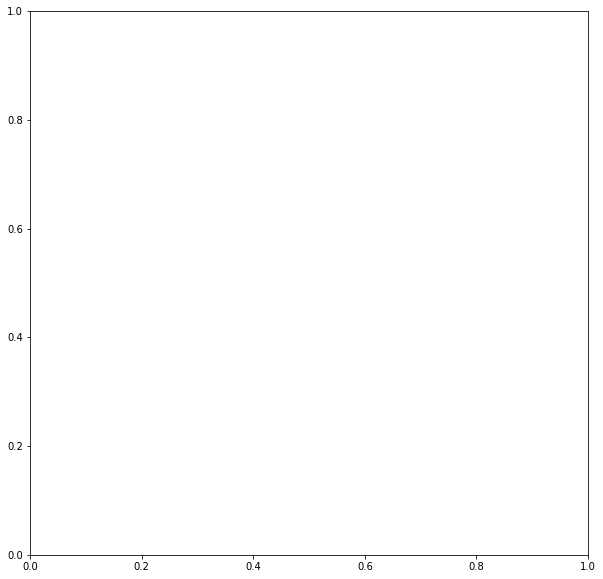

In [27]:
f, axes = plt.subplots(1, 1)
f.set_figheight(10)
f.set_figwidth(10)


massgrid = 10*np.linspace(np.log10(0.1),np.log10(10), 1000)

dfs=[]
for i in range (len(arrays)):
        iso = pd.DataFrame(ii(massgrid, arrays['logage'].values[i], arrays['feh'].values[i]))
        dfs.append(iso[iso['phase']==0].reset_index(drop=True))

for isochrone in dfs:
    axes.plot(isochrone['Gaia_BP_EDR3']-isochrone['Gaia_RP_EDR3'], isochrone['Gaia_G_EDR3'],
                    )


axes.plot(float(row[column_index('bp_rp')]),float(row[column_index('G')]),marker="o", markersize=5, markeredgecolor="red",
markerfacecolor="green")

sn.scatterplot(x=arrays['Gaia_BP_EDR3'].values - arrays['Gaia_RP_EDR3'].values,y=arrays['Gaia_RP_EDR3'].values,hue=arrays['logage'].values,ax=axes,s=12)

axes.invert_yaxis()
plt.legend()
axes.set_title("NGC 6705 p>0.9")
#plt.xlim(0,3)
plt.show()